In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

## 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
### - What is the probability that no cars drive up in the noon hour?
### - What is the probability that 3 or more cars come through the drive through?
### - How likely is it that the drive through gets at least 1 car?


In [14]:
window_bank = stats.poisson(2)

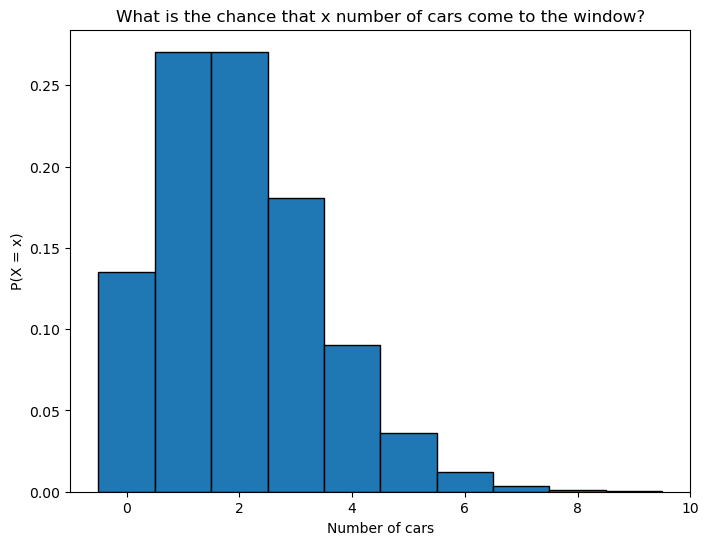

In [15]:
plt.figure(figsize=(8, 6))
x = np.arange(0, 10)
y = window_bank.pmf(x)

plt.bar(x, y, ec='black', width=1)
plt.title("What is the chance that x number of cars come to the window?")
plt.xlabel("Number of cars")
plt.ylabel("P(X = x)")
plt.show()

In [28]:
# What is the probability that no cars drive up in the noon hour?
n_sims = 10_000

(window_bank.rvs(n_sims) == 0).mean()

0.1401

In [29]:
window_bank.pmf(0)

0.1353352832366127

In [30]:
# What is the probability that 3 or more cars come through the drive through?
(window_bank.rvs(n_sims) >= 3).mean()

0.3207

In [31]:
# Theorical Answer
window_bank.sf(2)

0.32332358381693654

In [32]:
# Theorical Answer
window_bank.pmf(3) + window_bank.sf(3)

0.3233235838169365

In [33]:
# How likely is it that the drive through gets at least 1 car?
(window_bank.rvs(n_sims) >= 1).mean()

0.858

In [34]:
# Theorical Answer
window_bank.sf(0)

0.8646647167633873

## 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of 0.3. Calculate the following:
### - What grade point average is required to be in the top 5% of the graduating class?
### - What GPA constitutes the bottom 15% of the class?
### - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
### Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
### - If I have a GPA of 3.5, what percentile am I in?

In [23]:
# What grade point average is required to be in the top 5% of the graduating class?


In [35]:
# Theorical Answer
grades_distribution = stats.norm(3.0, 0.3)
grades_distribution.isf(.05)

3.4934560880854417

In [36]:
grades_distribution.ppf(.95)

3.4934560880854417

In [38]:
# What GPA constitutes the bottom 15% of the class?

In [39]:
# Theorical Answer
grades_distribution.ppf(.15)

2.689069983151863

In [40]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
# Theorical Answer
grades_distribution.ppf(.3)
# yes a student with a 2.846... or lower would qualify for the scolarship/

2.842679846187588

In [43]:
# Theorical Answer
grades_distribution.sf(3.5)

0.0477903522728147

## 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [44]:
website_distribution = stats.binom(4326, .02)
website_sim = website_distribution.rvs(n_sims)
website_sim.mean()

86.5314

In [45]:
(website_sim >= 97).mean()

0.1415

In [46]:
website_distribution.sf(96)

0.13975823631416448

## 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
### What is the probability that at least one of your first 60 answers is correct?


In [47]:
answer_distribution = stats.binom(60, .01)
(answer_distribution.rvs(n_sims) >= 1).mean()

0.4515

In [48]:
# Theoretical Answer
answer_distribution.sf(0)

0.45284335760923855

## 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [50]:
# 66 total students
# 0.9(66) visit the break room
# 0.03 chance one will clean
student_distribution = stats.binom(66, .9)

average_students = int(student_distribution.rvs(n_sims).mean().round())

cleaning_distribution = stats.binom(average_students, .03)

In [51]:
prob_of_clean_each_day = cleaning_distribution.sf(0)
prob_of_clean_each_day

0.8342199288437352

In [52]:
# How likely is it that it goes two days without getting cleaned up?
two_days_distribution = stats.binom(2, 1 - prob_of_clean_each_day)
two_days_distribution.pmf(2)

0.027483031992576224

In [53]:
# All week
one_week_distribution = stats.binom(5, 1 - prob_of_clean_each_day)
one_week_distribution.pmf(5)

0.00012521651388091348

## 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.


In [54]:
mean_people = 15
sd_people = 3

mean_wait = mean_people * 2
sd_wait = sd_people * 2

line_distribution = stats.norm(mean_wait, sd_wait)

In [55]:
max_time_i_can_wait = 45 - 12

line_distribution.cdf(max_time_i_can_wait)

0.6914624612740131

## 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.
### - What percent of employees earn less than 60,000?
### - What percent of employees earn more than 95,000?
### - What percent of employees earn between 65,000 and 80,000?
### - What do the top 5% of employees make?

##### Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so:


In [68]:
import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'  
salaries = pd.read_sql('SELECT * FROM salaries where to_date >now()', url)
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [69]:
μ = salaries.salary.mean()
μ

72012.23585730705

In [70]:
σ = salaries.salary.std()
σ

17309.995380251985

In [73]:
#What percent of employees earn less than 60,000?
stats.norm(μ, σ).cdf(60000)

0.24385742480214434

In [74]:
# What percent of employees earn more than 95,000?
stats.norm(μ, σ).sf(95000)

0.09208819199804058

In [75]:
# What percent of employees earn between 65,000 and 80,000?
( 1 - (stats.norm(μ, σ).cdf(65000))) - stats.norm (μ, σ).sf(80000)

0.3350605685446666

In [76]:
# What do the top 5% of employees make?
stats.norm(μ, σ).isf(.05)

100484.64454102777